### Gradients

#### Image Gradients

We have seen that we can design convolution kernels for blurring an image. We can also design a kernel that fires on sharp intensity discontinuities.

The directional change in intensity of pixels is called gradient.

The easiest way to understand gradients is to look at a few examples. Below is a piece of modern art created by yours truly. I have marked several locations on my art work with bright red dots and labeled them.

<img src = "images/gradients.jpg" width = 400 height = 400>



### Sobel Filter

To make gradient calculations even more robust and noisefree, the image can be Gaussian-blurred slightly before applying a gradient filter. As you know, blurring is also a convolution operation. So applying a Gaussian blur filter before applying the gradient filter would require two convolution operations.

Wouldn’t it be cool if we could use just one convolution operation that would implicitly blur and then calculate the gradient operations? We are in luck! Convolution is associative. Therefore, it is possible to combine the two convolution operations into one.

This where the Sobel Filters come in. They perform Gaussian smoothing implicitly. The Sobel filters for X Gradient and Y Gradient calculations are shown below.

<img src = "images/sobel.jpg" width = 500 height = 200>

### Implement an Edge Detection filter in OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = "images/truth.png"

image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if image is None:  
    print("Could not open or find the image")

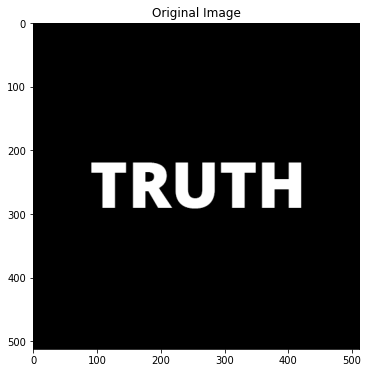

In [2]:
plt.figure(figsize = (6,6))
plt.imshow(image, cmap = 'gray')
plt.title("Original Image");

### Apply Sobel filter

In [3]:
# Apply sobel filter along x direction
sobelx = cv2.Sobel(image, cv2.CV_32F, 1, 0)
# Apply sobel filter along y direction
sobely = cv2.Sobel(image,cv2.CV_32F ,0 ,1)

### Normalize and visualize

Text(0.5, 1.0, 'Sobel Y Gradients')

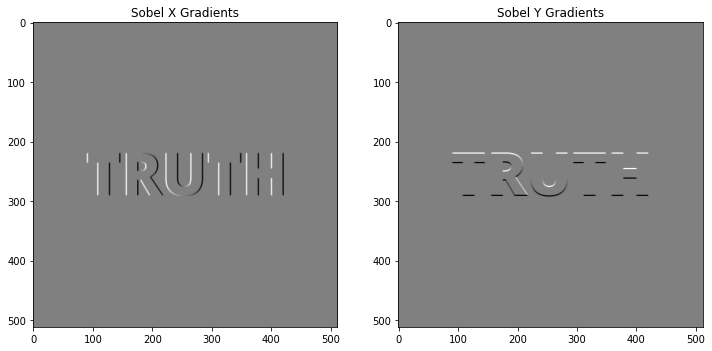

In [4]:
# Normalize image for display
cv2.normalize(sobelx, 
                dst = sobelx, 
                alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)
cv2.normalize(sobely, 
                dst = sobely, 
                alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)

plt.figure(figsize=[12,6])
plt.subplot(121);plt.imshow(sobelx, cmap='gray');plt.title("Sobel X Gradients")
plt.subplot(122);plt.imshow(sobely, cmap='gray');plt.title("Sobel Y Gradients")

### More on Sobel Filter and Edge Detection 
<a href = "https://en.wikipedia.org/wiki/Sobel_operator"> Sobel Operator and Edge Detection</a>